# 2.8

*a)* Formulation of boundary value problem

To find the Neumann boundary condition on the left and bottom edge we use the divergence theorem. The divergence theorem i given by
\begin{align*}
\iint_\Omega \nabla \cdot F \ dxdy = \int_\Gamma n \cdot F ds
\end{align*}
where $F$ is some vector field, $\nabla = \left( \frac{\partial}{\partial x} , \frac{\partial}{\partial y}\right)^\top$ and $n(x,y)$ is the normal vector at $(x,y) \in \Gamma$. The PDE we want to solve is given by
\begin{align*}
u_{xx} + u_{yy} = - \tilde{q}
\end{align*}
Note that $u_{xx} + u_{yy} = \nabla \cdot \nabla u$ such that
\begin{align*}
\nabla \cdot \nabla u = - \tilde{q}
\end{align*}
We integrate both sides over the domain $\Omega$
\begin{align*}
\iint_\Omega \nabla \cdot \nabla u \ dxdy = \iint_\Omega (- \tilde{q}) \ dxdy
\end{align*}
We see that we can use the divergence theorem on the left hand side. To do it on the right hand side aswell we search for a function $g$ such that $\nabla \cdot g = - \tilde{q}$. Then we have
\begin{align*}
\iint_\Omega \nabla \cdot \nabla u \ dxdy &= \iint_\Omega \nabla \cdot g \ dxdy \\[10pt]
\Rightarrow \int_\Gamma n \cdot \nabla u \ ds &= \int_\Gamma n \cdot g \ ds
\end{align*}
We can now skip the integral to get
\begin{align*}
n \cdot \nabla u = n \cdot g
\end{align*}
The left hand side is the directional derivative in direction $n$, which is the one needed for the Neumann boundary condition. We now find the function $g$, we know that
\begin{align*}
\nabla \cdot g = - \tilde{q} = - 2 \pi \cos(\pi x) \cos(\pi y)
\end{align*}
One can show that
\begin{align*}
 g(x,y) = \begin{bmatrix} - \pi \sin(\pi x) \cos(\pi y) \\ - \pi \cos(\pi x) \sin(\pi y) \end{bmatrix}
\end{align*}
will satisfy the equation above. Then we have the directional derivative
\begin{align*}
n \cdot \nabla u = n \cdot \begin{bmatrix} - \pi \sin(\pi x) \cos(\pi y) \\ - \pi \cos(\pi x) \sin(\pi y) \end{bmatrix}
\end{align*}
on the left boundary $n = (-1,0)^\top$ and $x=0$ in this case $n \cdot \nabla u = 0$, and on the bottom boundary we have $n = (0,-1)^\top$ and $y=0$ in this case $n \cdot \nabla u = 0$ hence
\begin{align*}
    n \cdot \nabla u = 0 \ \text{on} \ \Gamma_1
\end{align*}

*b)* Solve problem for $[0,1]\times [0,1]$

In [1]:
import numpy as np
from FEMsolver2d import BVP2D, plot_heatmap

In [2]:
(x0,y0) = (0,0)
L1 = 1
L2 = 1

noelms1 = 3
noelms2 = 3

lam1 = 1
lam2 = 1

qt = lambda x,y: 2*np.pi*np.pi*np.cos(np.pi*x)*np.cos(np.pi*y)

def f(x,y):
    if np.abs(x-x0-L1) < 1e-6 or np.abs(y-y0-L2) < 1e-6:
        return np.cos(np.pi*x)*np.cos(np.pi*y)
    else:
        return None

def q(x,y):
    if np.abs(x-x0) < 1e-6:
        return 0
    elif np.abs(y-y0) < 1e-6:
        return 0
    else:
        return None

u,VX,VY = BVP2D(x0,y0,L1,L2,noelms1,noelms2,qt,lam1,lam2,f,q)

In [3]:
ufun = lambda x,y: np.cos(np.pi*x)*np.cos(np.pi*y)
error = np.max(np.abs(u-ufun(VX,VY)))
print(error)

0.7294864903318017


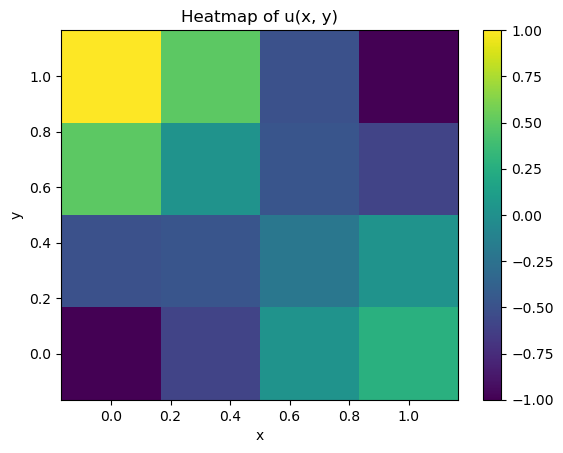

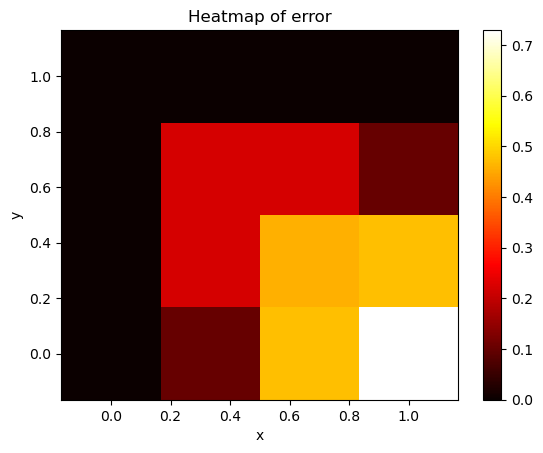

In [4]:
ufun = lambda x,y: np.cos(np.pi*x)*np.cos(np.pi*y)
plot_heatmap(u,VX,VY,ufun)

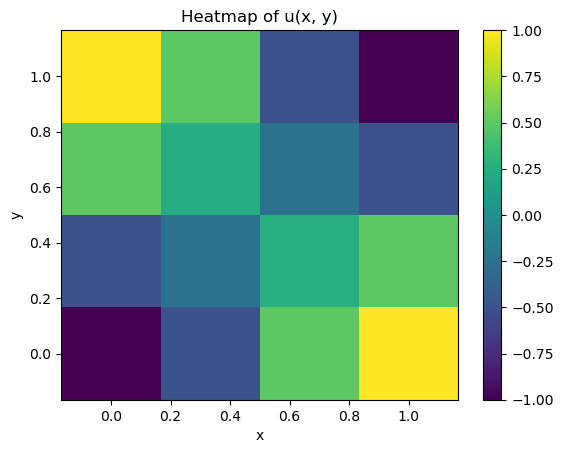

In [5]:
ufun = lambda x,y: np.cos(np.pi*x)*np.cos(np.pi*y)

plot_heatmap(ufun(VX,VY),VX,VY)

*c)* Solve original problem

In [6]:
(x0,y0) = (-1,-1)
L1 = 2
L2 = 2

noelms1 = 6
noelms2 = 6

lam1 = 1
lam2 = 1

qt = lambda x,y: 2*np.pi*np.pi*np.cos(np.pi*x)*np.cos(np.pi*y)

def f(x,y):
    return np.cos(np.pi*x)*np.cos(np.pi*y)


u,VX,VY = BVP2D(x0,y0,L1,L2,noelms1,noelms2,qt,lam1,lam2,f)

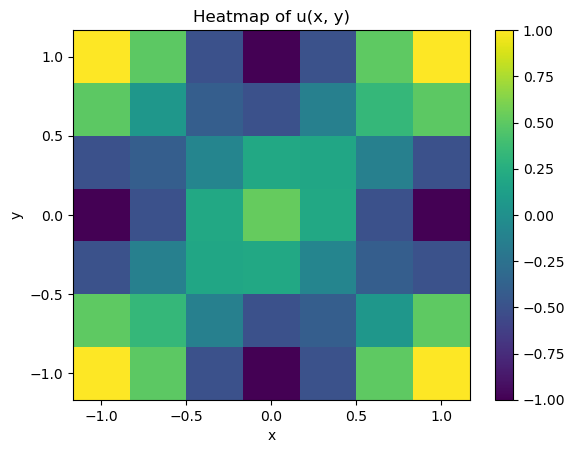

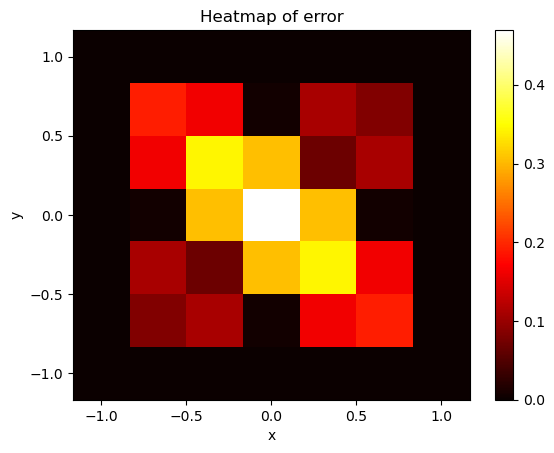

In [7]:
ufun = lambda x,y: np.cos(np.pi*x)*np.cos(np.pi*y)
plot_heatmap(u,VX,VY,ufun)

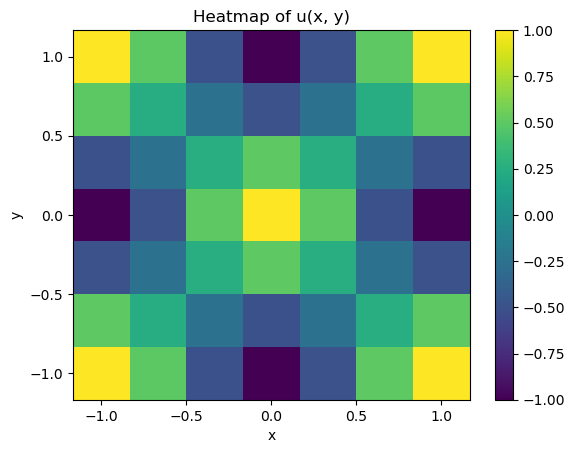

In [8]:
ufun = lambda x,y: np.cos(np.pi*x)*np.cos(np.pi*y)
plot_heatmap(ufun(VX,VY),VX,VY)

*d)* Compute approximations for differing meshes.